In [1]:
!pip install pandas
!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('AAPL',api_key='0277bc1ebee3a152e0e73b768c80e1d88edd997b')

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd


In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df2 = df.reset_index()['close']
df2.shape

(1257,)

In [8]:
import matplotlib.pyplot as plt

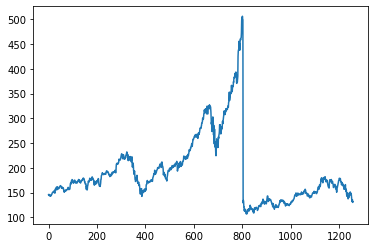

In [9]:
plt.plot(df2)

In [10]:
## scaling the value 0 to 1 using min-max scaller
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [12]:
df2

array([[0.09715717],
       [0.09878522],
       [0.09763306],
       ...,
       [0.07160927],
       [0.05815905],
       [0.06191609]])

In [37]:
#spliting datasets into train and test 7:3 ratio
training_size=int(len(df2)*0.70)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df),:1]

In [38]:
training_size,test_size

(879, 378)

In [39]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [40]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
print(X_train.shape), print(y_train.shape)
X_train

(778, 100)
(778,)


array([[0.09715717, 0.09878522, 0.09763306, ..., 0.17382592, 0.17292423,
        0.16989355],
       [0.09878522, 0.09763306, 0.09239825, ..., 0.17292423, 0.16989355,
        0.16814026],
       [0.09763306, 0.09239825, 0.09765811, ..., 0.16989355, 0.16814026,
        0.16155291],
       ...,
       [0.70695053, 0.66259236, 0.66028804, ..., 0.04393237, 0.03742016,
        0.04107702],
       [0.66259236, 0.66028804, 0.68227927, ..., 0.03742016, 0.04107702,
        0.03899812],
       [0.66028804, 0.68227927, 0.66667502, ..., 0.04107702, 0.03899812,
        0.03742016]])

In [42]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
!pip install tensorflow

In [45]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 10s 374ms/step - loss: 0.0390 - val_loss: 0.0015
Epoch 2/100
13/13 [==============================] - 3s 270ms/step - loss: 0.0141 - val_loss: 0.0082
Epoch 3/100
13/13 [==============================] - 3s 276ms/step - loss: 0.0101 - val_loss: 5.0678e-04
Epoch 4/100
13/13 [==============================] - 3s 276ms/step - loss: 0.0079 - val_loss: 5.2032e-04
Epoch 5/100
13/13 [==============================] - 5s 410ms/step - loss: 0.0079 - val_loss: 3.0727e-04
Epoch 6/100
13/13 [==============================] - 3s 268ms/step - loss: 0.0068 - val_loss: 0.0013
Epoch 7/100
13/13 [==============================] - 3s 267ms/step - loss: 0.0058 - val_loss: 2.5295e-04
Epoch 8/100
13/13 [==============================] - 3s 272ms/step - loss: 0.0052 - val_loss: 2.5067e-04
Epoch 9/100
13/13 [==============================] - 3s 274ms/step - loss: 0.0059 - val_loss: 4.5135e-04
Epoch 10/100
13/13 [==============================] - 3s 274ms/ste

In [49]:
import tensorflow as tf

In [50]:
tf.__version__

'2.9.1'

In [61]:
train_predict = model.predict(X_train)
test_predict =  model.predict(X_test)

9/9 [==============================] - 0s 37ms/step


In [62]:
#reverse the min-max scaler for finding root mean square error
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [63]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


228.80051276662104

In [64]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

155.50793654104686

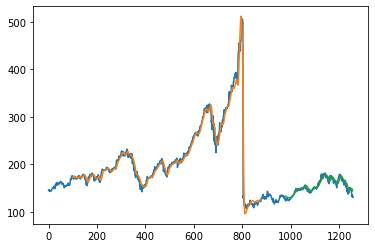

In [67]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [68]:
len(test_data)

378

In [84]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [85]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [86]:
temp_input

[0.13237319974953032,
 0.13119599248591102,
 0.15902316844082653,
 0.17016906700062612,
 0.16974326862867878,
 0.17282404508453347,
 0.165460237946149,
 0.16418284283030676,
 0.16235441452723853,
 0.17029430181590482,
 0.17392611145898557,
 0.16350657482780212,
 0.1547902316844082,
 0.15539135879774574,
 0.16518472135253592,
 0.1645835942391985,
 0.15539135879774574,
 0.15143393863494048,
 0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 

In [87]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.08551379]
101
1 day input [0.13119599 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024
 0.16418284 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023
 0.15539136 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994
 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046
 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271
 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835
 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292
 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626 0.17087038
 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985
 0.1463995  0.14584847 0.15168441 0.15125861 0.14922981 0.13763306
 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008
 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887
 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958
 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348
 0.107201   0.10519724 0.10487163 

4 day output [[0.08238937]]
[0.16974326862867878, 0.17282404508453347, 0.165460237946149, 0.16418284283030676, 0.16235441452723853, 0.17029430181590482, 0.17392611145898557, 0.16350657482780212, 0.1547902316844082, 0.15539135879774574, 0.16518472135253592, 0.1645835942391985, 0.15539135879774574, 0.15143393863494048, 0.14396994364433308, 0.13332498434564805, 0.14001252348152782, 0.14529743268628675, 0.14597370068879145, 0.14116468378209135, 0.14958046336881647, 0.1487539135879774, 0.14108954289292414, 0.13139636819035688, 0.1267376330619912, 0.1405385097056981, 0.12944270507201, 0.11994990607388845, 0.10965560425798371, 0.12085159674389478, 0.13212273011897302, 0.13470256731371316, 0.14311834690043823, 0.14662492172824038, 0.1552410770194113, 0.1587226048841578, 0.16839073262366933, 0.17001878522229175, 0.17222291797119593, 0.18063869755792106, 0.1776581089542893, 0.16974326862867878, 0.16899185973700687, 0.1793362554790231, 0.17087038196618654, 0.16278021289918598, 0.1635566687539135,

8 day output [[0.08655281]]
[0.16235441452723853, 0.17029430181590482, 0.17392611145898557, 0.16350657482780212, 0.1547902316844082, 0.15539135879774574, 0.16518472135253592, 0.1645835942391985, 0.15539135879774574, 0.15143393863494048, 0.14396994364433308, 0.13332498434564805, 0.14001252348152782, 0.14529743268628675, 0.14597370068879145, 0.14116468378209135, 0.14958046336881647, 0.1487539135879774, 0.14108954289292414, 0.13139636819035688, 0.1267376330619912, 0.1405385097056981, 0.12944270507201, 0.11994990607388845, 0.10965560425798371, 0.12085159674389478, 0.13212273011897302, 0.13470256731371316, 0.14311834690043823, 0.14662492172824038, 0.1552410770194113, 0.1587226048841578, 0.16839073262366933, 0.17001878522229175, 0.17222291797119593, 0.18063869755792106, 0.1776581089542893, 0.16974326862867878, 0.16899185973700687, 0.1793362554790231, 0.17087038196618654, 0.16278021289918598, 0.1635566687539135, 0.158422041327489, 0.14755165936130238, 0.1523356293049467, 0.15919849718221663, 

13 day output [[0.09224932]]
[0.15539135879774574, 0.16518472135253592, 0.1645835942391985, 0.15539135879774574, 0.15143393863494048, 0.14396994364433308, 0.13332498434564805, 0.14001252348152782, 0.14529743268628675, 0.14597370068879145, 0.14116468378209135, 0.14958046336881647, 0.1487539135879774, 0.14108954289292414, 0.13139636819035688, 0.1267376330619912, 0.1405385097056981, 0.12944270507201, 0.11994990607388845, 0.10965560425798371, 0.12085159674389478, 0.13212273011897302, 0.13470256731371316, 0.14311834690043823, 0.14662492172824038, 0.1552410770194113, 0.1587226048841578, 0.16839073262366933, 0.17001878522229175, 0.17222291797119593, 0.18063869755792106, 0.1776581089542893, 0.16974326862867878, 0.16899185973700687, 0.1793362554790231, 0.17087038196618654, 0.16278021289918598, 0.1635566687539135, 0.158422041327489, 0.14755165936130238, 0.1523356293049467, 0.15919849718221663, 0.14639949906073885, 0.1458484658735128, 0.15168440826549778, 0.15125860989355033, 0.14922980588603624,

18 day output [[0.09755325]]
[0.14396994364433308, 0.13332498434564805, 0.14001252348152782, 0.14529743268628675, 0.14597370068879145, 0.14116468378209135, 0.14958046336881647, 0.1487539135879774, 0.14108954289292414, 0.13139636819035688, 0.1267376330619912, 0.1405385097056981, 0.12944270507201, 0.11994990607388845, 0.10965560425798371, 0.12085159674389478, 0.13212273011897302, 0.13470256731371316, 0.14311834690043823, 0.14662492172824038, 0.1552410770194113, 0.1587226048841578, 0.16839073262366933, 0.17001878522229175, 0.17222291797119593, 0.18063869755792106, 0.1776581089542893, 0.16974326862867878, 0.16899185973700687, 0.1793362554790231, 0.17087038196618654, 0.16278021289918598, 0.1635566687539135, 0.158422041327489, 0.14755165936130238, 0.1523356293049467, 0.15919849718221663, 0.14639949906073885, 0.1458484658735128, 0.15168440826549778, 0.15125860989355033, 0.14922980588603624, 0.13763306199123349, 0.140363180964308, 0.1251346274264245, 0.12455854727614268, 0.14226675015654344, 0

21 day output [[0.10051721]]
[0.14529743268628675, 0.14597370068879145, 0.14116468378209135, 0.14958046336881647, 0.1487539135879774, 0.14108954289292414, 0.13139636819035688, 0.1267376330619912, 0.1405385097056981, 0.12944270507201, 0.11994990607388845, 0.10965560425798371, 0.12085159674389478, 0.13212273011897302, 0.13470256731371316, 0.14311834690043823, 0.14662492172824038, 0.1552410770194113, 0.1587226048841578, 0.16839073262366933, 0.17001878522229175, 0.17222291797119593, 0.18063869755792106, 0.1776581089542893, 0.16974326862867878, 0.16899185973700687, 0.1793362554790231, 0.17087038196618654, 0.16278021289918598, 0.1635566687539135, 0.158422041327489, 0.14755165936130238, 0.1523356293049467, 0.15919849718221663, 0.14639949906073885, 0.1458484658735128, 0.15168440826549778, 0.15125860989355033, 0.14922980588603624, 0.13763306199123349, 0.140363180964308, 0.1251346274264245, 0.12455854727614268, 0.14226675015654344, 0.12726361928616153, 0.12804007514088916, 0.13184721352536, 0.14

24 day output [[0.10335635]]
[0.14958046336881647, 0.1487539135879774, 0.14108954289292414, 0.13139636819035688, 0.1267376330619912, 0.1405385097056981, 0.12944270507201, 0.11994990607388845, 0.10965560425798371, 0.12085159674389478, 0.13212273011897302, 0.13470256731371316, 0.14311834690043823, 0.14662492172824038, 0.1552410770194113, 0.1587226048841578, 0.16839073262366933, 0.17001878522229175, 0.17222291797119593, 0.18063869755792106, 0.1776581089542893, 0.16974326862867878, 0.16899185973700687, 0.1793362554790231, 0.17087038196618654, 0.16278021289918598, 0.1635566687539135, 0.158422041327489, 0.14755165936130238, 0.1523356293049467, 0.15919849718221663, 0.14639949906073885, 0.1458484658735128, 0.15168440826549778, 0.15125860989355033, 0.14922980588603624, 0.13763306199123349, 0.140363180964308, 0.1251346274264245, 0.12455854727614268, 0.14226675015654344, 0.12726361928616153, 0.12804007514088916, 0.13184721352536, 0.14822792736380713, 0.12505948653725735, 0.12633688165309953, 0.11

28 day output [[0.1070003]]
[0.1267376330619912, 0.1405385097056981, 0.12944270507201, 0.11994990607388845, 0.10965560425798371, 0.12085159674389478, 0.13212273011897302, 0.13470256731371316, 0.14311834690043823, 0.14662492172824038, 0.1552410770194113, 0.1587226048841578, 0.16839073262366933, 0.17001878522229175, 0.17222291797119593, 0.18063869755792106, 0.1776581089542893, 0.16974326862867878, 0.16899185973700687, 0.1793362554790231, 0.17087038196618654, 0.16278021289918598, 0.1635566687539135, 0.158422041327489, 0.14755165936130238, 0.1523356293049467, 0.15919849718221663, 0.14639949906073885, 0.1458484658735128, 0.15168440826549778, 0.15125860989355033, 0.14922980588603624, 0.13763306199123349, 0.140363180964308, 0.1251346274264245, 0.12455854727614268, 0.14226675015654344, 0.12726361928616153, 0.12804007514088916, 0.13184721352536, 0.14822792736380713, 0.12505948653725735, 0.12633688165309953, 0.11326236693800873, 0.11939887288666245, 0.09933625547902314, 0.08946775203506574, 0.10

In [88]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [89]:
import matplotlib.pyplot as plt

In [90]:
len(df2)

1257

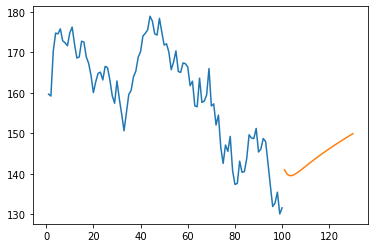

In [93]:
plt.plot(day_new,scaler.inverse_transform(df2[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

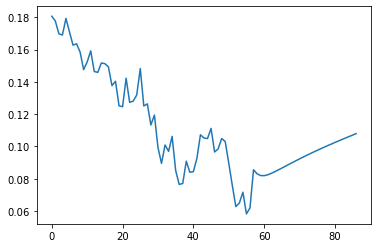

In [97]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [98]:
df3=scaler.inverse_transform(df3).tolist()

In [100]:
df3


[[145.63],
 [146.28],
 [145.82],
 [143.73],
 [145.83],
 [143.68],
 [144.02],
 [143.5],
 [144.09],
 [142.73],
 [144.18],
 [145.06],
 [145.53],
 [145.74],
 [147.77],
 [149.04],
 [149.56],
 [150.08],
 [151.02],
 [150.34],
 [150.27],
 [152.09],
 [152.74],
 [153.46],
 [150.56],
 [149.5],
 [148.73],
 [150.05],
 [157.14],
 [155.57],
 [156.39],
 [158.81],
 [160.08],
 [161.059998],
 [155.32],
 [157.48],
 [159.85],
 [161.6],
 [160.95],
 [157.86],
 [157.5],
 [157.21],
 [159.78],
 [159.98],
 [159.27],
 [159.86],
 [161.47],
 [162.91],
 [163.35],
 [164.0],
 [164.05],
 [162.08],
 [161.91],
 [161.26],
 [158.63],
 [161.5],
 [160.86],
 [159.65],
 [158.28],
 [159.88],
 [158.67],
 [158.73],
 [156.07],
 [153.39],
 [151.89],
 [150.55],
 [153.14],
 [154.23],
 [153.28],
 [154.12],
 [153.81],
 [154.48],
 [153.48],
 [155.39],
 [155.3],
 [155.84],
 [155.9],
 [156.55],
 [156.0],
 [156.99],
 [159.88],
 [160.47],
 [159.76],
 [155.98],
 [156.25],
 [156.17],
 [157.1],
 [156.41],
 [157.41],
 [163.05],
 [166.72],
 [169